#Step 1: Install And Import Python Libraries

In [ ]:
# Install libraries
!pip install -q transformers[torch] datasets evaluate
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.2 MB/s eta 0:00:00


In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Visualize tools
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
import tensorflow as tf
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback, TextClassificationPipeline, AutoModel
# Hugging Face Dataset
from datasets import Dataset
# Model performance evaluation
import evaluate

In [ ]:
from transformers import AutoModel

#Step 2: Download And Read Data

In [ ]:
#

##Read csv file

In [ ]:
train_df = pd.read_csv('/content/cleaned_data.csv', sep='|', engine='python', encoding='utf-8', on_bad_lines='skip')
train_df.reset_index(inplace=True)
train_df

,index,authors,title,abstracts,description,doi,affiliation,city,country,latitude,longitude
0,0,"Rujitharanawong C., Tuchinda P., Chularojanamo...",Direct immunofluorescence staining patterns co...,© 2021 British Association of Dermatologists.T...,This retrospective study performed to investig...,doi:10.1111/ced.14879,Siriraj Hospital,Bangkok,Thailand,13.824580,100.622446
1,1,"Muangnapoh C., Tamboon E., Supha N., Toyting J...",Multilocus Sequence Typing and Virulence Poten...,Copyright © 2022 Muangnapoh et al.Vibrio parah...,"Vibrio parahaemolyticus is a Gram-negative, fo...",doi:10.1128/spectrum.00886-22,"Mahidol University, Faculty of Dentistry",Bangkok,Thailand,13.824580,100.622446
2,2,"Wannasrichan W., Htoo H.H., Suwansaeng R., Pog...",Phage-resistant Pseudomonas aeruginosa against...,"Copyright © 2022 Wannasrichan, Htoo, Suwansaen...","Pseudomonas aeruginosa, a major cause of nosoc...",doi:10.3389/fmicb.2022.1004733,School of Biological Sciences,San Diego,United States,32.717420,-117.162773
3,3,"Treepongkaruna S., Kyaw K., Jiraporn P.",Shareholder litigation rights and ESG controve...,© 2022 The AuthorsLeveraging as a quasi-natura...,Leveraging as a quasi-natural experiment the s...,doi:10.1016/j.irfa.2022.102396,NTNU Business School,Trondheim,Norway,63.430447,10.395212
4,4,"Buatong J., Dvorak V., Thepparat A., Thongkhao...",Phlebotomine Sand Flies in Southern Thailand: ...,"© 2022 by the authors. Licensee MDPI, Basel, S...",An entomological survey at rural and cavernico...,doi:10.3390/insects13020197,Chulalongkorn University,Bangkok,Thailand,13.824580,100.622446
...,...,...,...,...,...,...,...,...,...,...,...
2032,2032,"Amano M., Lohwacharin J., Dubechot A., Takizaw...",Performance of integrated ferrate–polyaluminum...,© 2018 Elsevier LtdFerrate-based technologies ...,Ferrate-based technologies can play versatile ...,doi:10.1016/j.jenvman.2018.02.022,Chulalongkorn University,Bangkok,Thailand,13.824580,100.622446
2033,2033,"Sirunyan A.M., Tumasyan A., Adam W., Asilar E....",Search for natural supersymmetry in events wit...,"© 2018, The Author(s).Results are presented fr...",Results are presented from a search for natura...,doi:10.1007/JHEP03(2018)167,Rheinisch-Westfälische Technische Hochschule A...,Aachen,Germany,50.776351,6.083862
2034,2034,"Hemra K., Yamaguchi S., Kobayashi T., Aungkava...",Compressive strength and setting time modifica...,"© 2018 Trans Tech Publications, Switzerland.Cl...",Class C fly ash is widely used as a geopolymer...,doi:10.4028/www.scientific.net/KEM.766.157,Chulalongkorn University,Bangkok,Thailand,13.824580,100.622446
2035,2035,"Greeviroj P., Kitrungphaiboon T., Katavetin P....",Cinacalcet for treatment of chronic kidney dis...,"© 2018 S. Karger AG, Basel.Background: Cinacal...",Background: Cinacalcet could decrease serum ca...,doi:10.1159/000487546,Chulalongkorn University,Bangkok,Thailand,13.824580,100.622446


#Step 4: Convert Pandas Dataframe to Hugging Face Dataset

In [ ]:
train_data = train_df[['abstracts', 'title']]

#Step 5: Tokenize Text

In [ ]:
from transformers import AutoTokenizer, DebertaV2Model, DebertaV2ForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained('morenolq/thext-cs-scibert')
model = AutoModel.from_pretrained('morenolq/thext-cs-scibert').cuda()

In [ ]:
from tqdm import tqdm
vectors = list()
for i in tqdm(train_df.values[:3000]):
  text = i[3]
  # print(text)
  # break
  input_ids = tokenizer.encode(text, max_length=512, truncation=True, padding="max_length", return_tensors="pt").cuda()
  with torch.no_grad():
      embeddings = model(input_ids)
      numvec = embeddings[0][0].detach().cpu().numpy()
      # vectors.append([i[0], numvec])
      vectors.append(numvec)

100%|██████████| 2037/2037 [01:20<00:00, 25.35it/s]


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def find_most_similar_vectors(new_vector, all_vectors, top_n=5):
    # Reshape all_vectors to 2D
    all_vectors_flat = all_vectors.reshape(all_vectors.shape[0], -1)

    # Flatten the new_vector
    new_vector_flat = new_vector.flatten()

    # Calculate cosine similarity between the new vector and all vectors
    similarities = cosine_similarity([new_vector_flat], all_vectors_flat)[0]

    # Get indices of top N most similar vectors
    top_indices = similarities.argsort()[-top_n:][::-1]

    # Get the actual vectors corresponding to the top indices
    most_similar_vectors = all_vectors[top_indices]

    return most_similar_vectors, top_indices, similarities[top_indices]

# Load the numpy array from 'test0.npy'
d = np.stack(vectors)

# Assuming the shape of 'all_vectors' is [10, 512, 768]
all_vectors = d

# Extract a new vector (you may want to modify this based on your actual use case)
new_vector = d[0][::]

# Find the 5 most similar vectors
most_similar_vectors, top_indices, top_similarities = find_most_similar_vectors(new_vector, all_vectors, top_n=5)

# Print the results
print("Top 5 Most Similar Vectors:")
print(most_similar_vectors)
print("\nTop Indices:", top_indices)
print("\nTop Similarities:", top_similarities)


In [ ]:
print(len(most_similar_vectors))

5


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [ ]:
numpy_array1 = [1.0000113, 0.7729803, 0.77262163, 0.77089155, 0.7703329]
numpy_array2 = [0, 933, 1931, 491, 744]

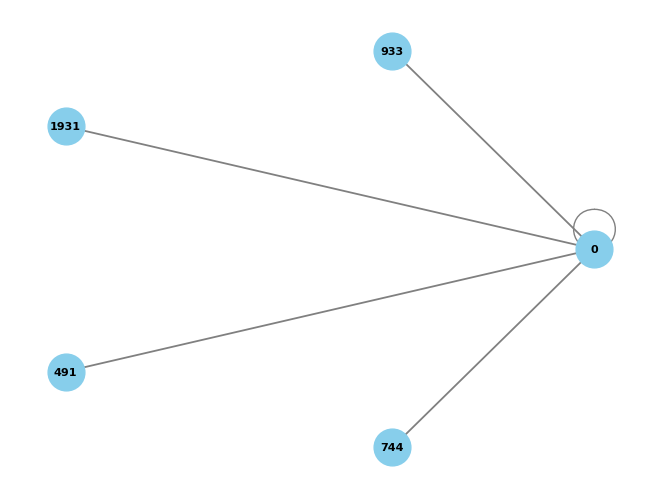

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Calculate distances as 1/x
distances = 1 / numpy_array1

# Create a graph
G = nx.Graph()

# Add nodes to the graph with labels from numpy_array2
for label in numpy_array2:
    G.add_node(label)

# Add edges with weights based on the distances
for i, node_label in enumerate(numpy_array2):
    G.add_edge(0, node_label, weight=distances[i])

# Define positions for the nodes (circular layout for simplicity)
pos = nx.circular_layout(G)

# Extract edge weights for plotting
edge_weights = [G[u][v]['weight'] for u, v in G.edges]

# Draw the graph
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, width=edge_weights, edge_color='gray', cmap=plt.cm.Blues)

# Show the plot
plt.show()


In [ ]:
train_df.iloc[1506]['abstracts']

'© Copyright 2022, Mary Ann Liebert, Inc., publishers 2022.Data are lacking or outdated on burden of HIV, viral hepatitis infection, and sexually transmitted infections such as syphilis among people deprived of liberty in the Asia-Pacific region. We aimed to evaluate the proportion of viral hepatitis B (HBV), hepatitis C (HCV), HIV, and syphilis infections, and factors associated with HCV, HBV, and HIV infection in a central male prison. A cross-sectional study was performed among 1,028 people deprived of liberty from a central male prison in Bangkok, Thailand. People deprived of liberty were screened for HIV, HBV, HCV, and syphilis infections during 2018-2019. HBV and HCV were defined as positive hepatitis B surface antigen and positive anti-HCV antibody, respectively. Proportions (95% confidence interval [CI]) of infections were calculated based on the binomial distribution. HBV proportion was reported for different age groups. Risk factors associated with HCV infections were evaluat

In [ ]:
train_df[]